In [2]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/kellyg/books-analysis/data/data_for_cleaning.csv')

Change the location to be just the country rather than city,region,country

In [6]:
data['Location'] = data['Location'].apply(lambda x: x.split(',')[-1].strip())
data.dropna(subset=['Location'], inplace=True)
data.head(10)

,Unnamed: 0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,5,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8,canada,30.0
1,13,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,219008,7,canada,60.0
2,14,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,263325,6,canada,27.0
3,16,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,2954,8,usa,71.0
4,17,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,152827,7,canada,40.0
5,19,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,35704,6,usa,53.0
6,21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,110912,10,usa,36.0
7,23,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,157969,8,usa,30.0
8,25,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,192665,8,usa,47.0
9,26,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,197659,9,usa,49.0


Get the count of locations that appear, and drop any countries that appear less than 1000 times. This leaves us with 11 possible countries

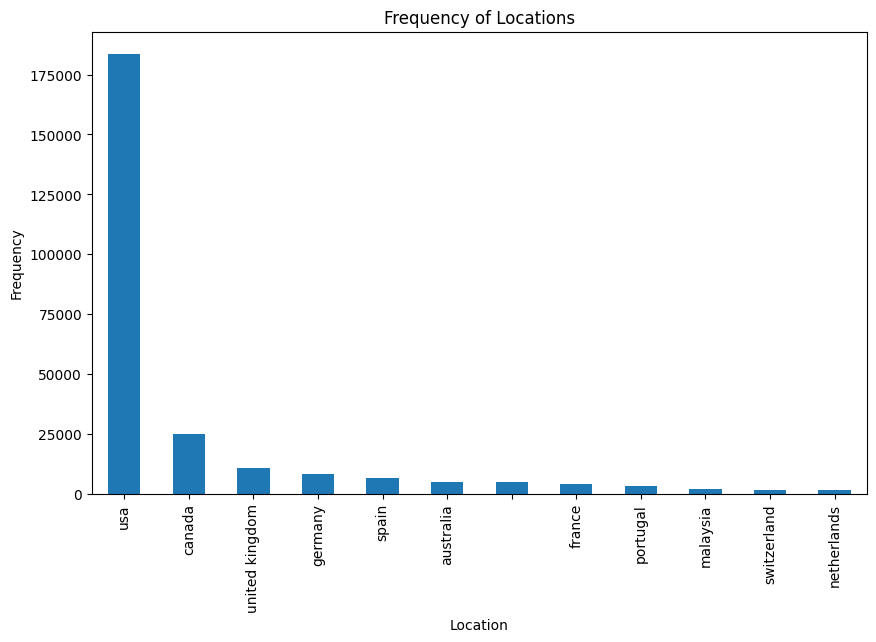

In [7]:
location_counts = data['Location'].value_counts()
locations_to_keep = location_counts[location_counts >= 1000].index
data = data[data['Location'].isin(locations_to_keep)]

plt.figure(figsize=(10, 6))
location_counts = data['Location'].value_counts()
location_counts.plot(kind='bar')
plt.title('Frequency of Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()